### Python module/package imports for this chapter

In [1]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML

**March 2020 update**

* at 00:59 in the video: the `turtle.py` module was updated to work correctly with newer versions of `matplotlib`, and by default animations are now shown with a Javascript player. HTML5 movies can be generated instead by using `Terrarium(animate=True, javascript=False)`.

### Code from previous videos (enhanced)

In [3]:
from turtle import Turtle, Terrarium

## Exploiting class inheritance in Python

In [5]:
 
def polyspi(t,side,angle):
    if side:
        t.forward(side)
        t.right(angle)
        polyspi(t,side-2, angle) #recurssion

In [7]:
#Make a movie of the motion
with Terrarium(animate=True) as t: #python context manager (rescales at end of block)
    t1 = Turtle(t,'coral')
    t1.point(1)
    polyspi(t1,100,119)

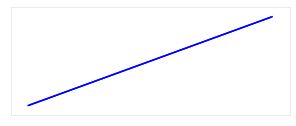

In [8]:
#Make a staight line of the motion
with Terrarium() as t: #python context manager (rescales at end of block)
    t1 = Turtle(t)
    t1.left(20)
    for i in range(200):
        t1.forward(1)

## Using Inheritance and overides with parent child relation

Draws an akward line

In [14]:
class ShakyTurtle(Turtle):
    def forward(self,distance): #Overide forward
        self.right(random.uniform(-10,10)) #turn between 10 &-10 degrees
        super().forward(random.uniform(0.75,1.25)*distance) #call parent Turtle forward

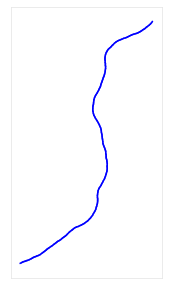

In [15]:
#Make a staight line of the motion
with Terrarium() as t: #python context manager (rescales at end of block)
    t1 = ShakyTurtle(t)
    t1.left(20)
    for i in range(200): 
        t1.forward(1) #call forward 200 times each time adjust + || - 10 degrees and moves forward

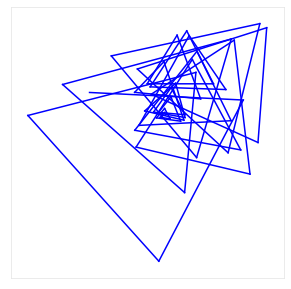

In [16]:
 #Extra random polyspi
with Terrarium() as t: #python context manager (rescales at end of block)
    t1 = ShakyTurtle(t)
    polyspi(t1,100,119)

Adding more control to shakyturtle

In [19]:
class ShakyTurtle(Turtle):
    def __init__(self,t, col='b', shakiness=10):
        super().__init__(t,col) # Call the init of parent class for rest of attrs
        self.shakiness= shakiness
    
    def forward(self,distance): #Overide forward
        self.right(random.uniform(-10,10)* self.shakiness) #turn between 10 &-10 degrees *
        super().forward(random.uniform(0.75,1.25)*distance) #call parent Turtle forward

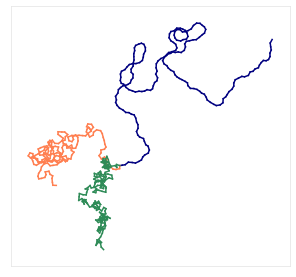

In [20]:
#Shakey Turtle with more control
with Terrarium() as t: #python context manager (rescales at end of block)
    t1 = ShakyTurtle(t, 'navy', 5)
    t2 = ShakyTurtle(t, 'coral', 10)
    t3 = ShakyTurtle(t, 'seagreen', 50)

    t1.left(20)
    for i in range(200): 
        for ti in (t1,t2,t3):#For each turtle
            ti.forward(1) #call forward 200 times each time adjust + || - 10 degrees and moves forward

## Make a predator turtle that chases other turtles 

In [22]:
class PredatorTurtle(ShakyTurtle): #PredatorTurtle derives from shakyturtle 
    def follow(self, prey, distance):
        dx, dy = prey.pos[0] - self.pos[0], prey.pos[1] - self.pos[1] #calculate distance
        angle_to_prey = math.atan2(dy,dx) / self.deg - self.angle #calculate angle to meet prey
        
        self.left(angle_to_prey) # turn towards
        super().forward(distance) #Move forward using parent function
        
        
    

In [24]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t, 'navy', 15)
    t2 = PredatorTurtle(t, 'coral', 5)
    
    for i in range(200): 
        t1.forward(1) 
        t2.follow(t1,0.75)
    t1.point(); t2.point()

## Modify the class on the fly
<p>Instead of modifing the turtle class i can add a method to it from here.</p>

In [26]:
#define a method for Turtle class outside of the class.
#By passsing turtle as the first argument it acts as passing self and will allow all turtle to use it
def move(turtle,pos):
    turtle.pos = pos
    
Turtle.move = move
    

In [28]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t, 'navy', 15)
    t2 = PredatorTurtle(t, 'coral', 5)
    
    t1.move((75,75))
    for i in range(200): 
        t1.forward(1) 
        t2.follow(t1,0.75)
    t1.point(); t2.point()